K = 0.08976077337316268
Fehlerfortpflanzung = 0.0029920257791054227


/tmp/ipykernel_7253/1524765039.py:10: RuntimeWarning: divide by zero encountered in log
  fd = lambda x: (np.log(x) - 1) / (np.log(x)**2)
/tmp/ipykernel_7253/1524765039.py:10: RuntimeWarning: divide by zero encountered in divide
  fd = lambda x: (np.log(x) - 1) / (np.log(x)**2)
/tmp/ipykernel_7253/1524765039.py:10: RuntimeWarning: invalid value encountered in divide
  fd = lambda x: (np.log(x) - 1) / (np.log(x)**2)
/tmp/ipykernel_7253/1524765039.py:9: RuntimeWarning: divide by zero encountered in log
  f = lambda x: x / np.log(x)
/tmp/ipykernel_7253/1524765039.py:9: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: x / np.log(x)
/tmp/ipykernel_7253/1524765039.py:7: RuntimeWarning: invalid value encountered in divide
  return abs(derivative(x)) * abs(x) / abs(func(x))


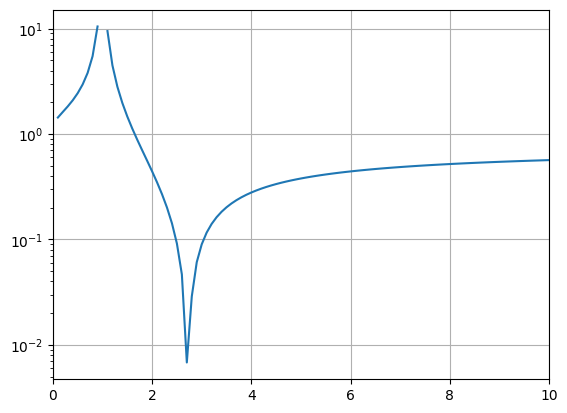

1000000.4999711609
0.00010001500083337232


NotImplementedError: solving Abs(x) when the argument is not real or imaginary.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Calculates the condition of a given function
def condition(func, derivative, x):
    return abs(derivative(x)) * abs(x) / abs(func(x))

f = lambda x: x / np.log(x)
fd = lambda x: (np.log(x) - 1) / (np.log(x)**2)

K = condition(f,fd,3)
err = 0.1
x = 3
print(f'K = {K}')
print(f'Fehlerfortpflanzung = {K*(err/x)}')

x = np.arange(0,10+0.1,0.1)
plt.figure()
plt.plot(x, condition(f,fd,x))
plt.grid()
plt.xlim(0,10)
plt.semilogy()
plt.show()

print(condition(f,fd,0.999999))
print(np.abs(f(1.0001))/np.abs(fd(1.0001)))

x = sp.var("x")
f = x / sp.ln(x)
fd = sp.diff(x)
cond = (sp.Abs(fd) * sp.Abs(x)) / sp.Abs(f)
print(sp.solve(cond, x))



In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

alpha = 0.3
a = np.array([
    [1, alpha, 0, -alpha, ],
    [alpha, 1, -alpha, 0, ],
    [0, -alpha, 1, alpha, ],
    [-alpha, 0, alpha, 1, ],
], dtype=np.float64)

b = np.array([
    [2.3, ],
    [-1.3, ],
    [2.7, ],
    [-1.7, ],
], dtype=np.float64)

x0 = np.array([
    [-1, ],
    [-1, ],
    [1, ],
    [-1, ],
], dtype=np.float64)

n = 1

# Solve

s = a.shape

x = x0
for _ in range(n):
    x_new = np.zeros(s[0])
    for i in range(s[0]):
        x_new[i] = (1 / a[i, i]) * (b[i] - np.sum(a[i, :i] * x[:i]) - np.sum(a[i, i + 1:] * x[i + 1:]))
    x = x_new

# Output

print(f'x = {x}')


x = [ 2.3  1.   0.4 -1.7]


In [ ]:
alpha = 0.3
a = np.array([
    [1, alpha, 0, -alpha, ],
    [alpha, 1, -alpha, 0, ],
    [0, -alpha, 1, alpha, ],
    [-alpha, 0, alpha, 1, ],
], dtype=np.float64)

b = np.array([
    [2.3, ],
    [-1.3, ],
    [2.7, ],
    [-1.7, ],
], dtype=np.float64)

x0 = np.array([
    [-1, ],
    [-1, ],
    [1, ],
    [-1, ],
], dtype=np.float64)

n = 1

# Solve

def err(func, x, error):
    return func(x + error) * func(x - error)

s = a.shape

x = x0
for _ in range(n):
    x_new = np.zeros(s[0])
    for i in range(s[0]):
        x_new[i] = (1 / a[i, i]) * (b[i] - np.sum(a[i, :i] * x[:i]) - np.sum(a[i, i + 1:] * x[i + 1:]))
    x = x_new


# Output

print(f'x = {x}')


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

alpha = sp.var("alpha")
A = sp.Matrix([
    [4, -alpha, ],
    [-3, alpha, ],
])

b = sp.Matrix([
    [1, ],
    [-2, ],
])


A_inv = 1 / (4*alpha - ((-3) * (-alpha))) * sp.Matrix([[alpha, alpha],[3,4]])

def cond(matrix):
    return matrix.norm(ord=1) * matrix.inv().norm(ord=1)

print(cond(A.replace(alpha, 5)))

In [89]:
a = np.array([
    [3, 0, 0, ],
    [1, 3, 0, ],
    [0, 0, 6, ],
])
x0 = np.array([1, 1, 1], dtype=np.float64)

n = 35

v = x0 / np.linalg.norm(x0, ord=2)

for i in range(n):
    v = a @ v
    v = v / np.linalg.norm(v, ord=2)
    print(f'v_{i + 1} = {v}, λ_{i + 1} = {(v.T @ a @ v) / (v.T @ v)}')

print('')
print(f'v = {v}, λ = {(v.T @ a @ v) / (v.T @ v)}')


v_1 = [0.38411064 0.51214752 0.76822128], λ_1 = 4.967213114754099
v_2 = [0.22485951 0.37476584 0.89943803], λ_2 = 5.51123595505618
v_3 = [0.12038585 0.24077171 0.96308682], λ_3 = 5.811594202898551
v_4 = [0.06172787 0.1440317  0.98764596], λ_4 = 5.935224386113463
v_5 = [0.03112696 0.08300524 0.99606287], λ_5 = 5.979007428140812
v_6 = [0.01560596 0.04681788 0.99878153], λ_6 = 5.993424257184607
v_7 = [0.00780961 0.02603205 0.9996306 ], λ_7 = 5.997987327618337
v_8 = [0.00390582 0.01432134 0.99988982], λ_8 = 5.999394868074459
v_9 = [0.00195306 0.00781225 0.99996758], λ_9 = 5.999820720854742
v_10 = [0.00097655 0.00423173 0.99999057], λ_10 = 5.999947548901907
v_11 = [0.00048828 0.00227864 0.99999728], λ_11 = 5.9999848207662305
v_12 = [0.00024414 0.0012207  0.99999923], λ_12 = 5.9999956488676744
v_13 = [0.00012207 0.00065104 0.99999978], λ_13 = 5.9999987632041645
v_14 = [0.00006104 0.00034587 0.99999994], λ_14 = 5.9999996510645195
v_15 = [0.00003052 0.00018311 0.99999998], λ_15 = 5.99999990221